In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB
None


In [ ]:
features_to_use = [
    'annual_income','debt_to_income_ratio','credit_score','loan_amount','interest_rate',
    'gender','marital_status','education_level','employment_status','loan_purpose',
    'grade_subgrade','loan_paid_back'
]

X = train_df[features_to_use]
#y = train_df['loan_payback']
X_test = test_df[features_to_use]

categorical_features = [
    'gender','marital_status','education_level','employment_status','loan_purpose',
    'grade_subgrade','loan_paid_back'

]

KeyError: 'loan_payback'

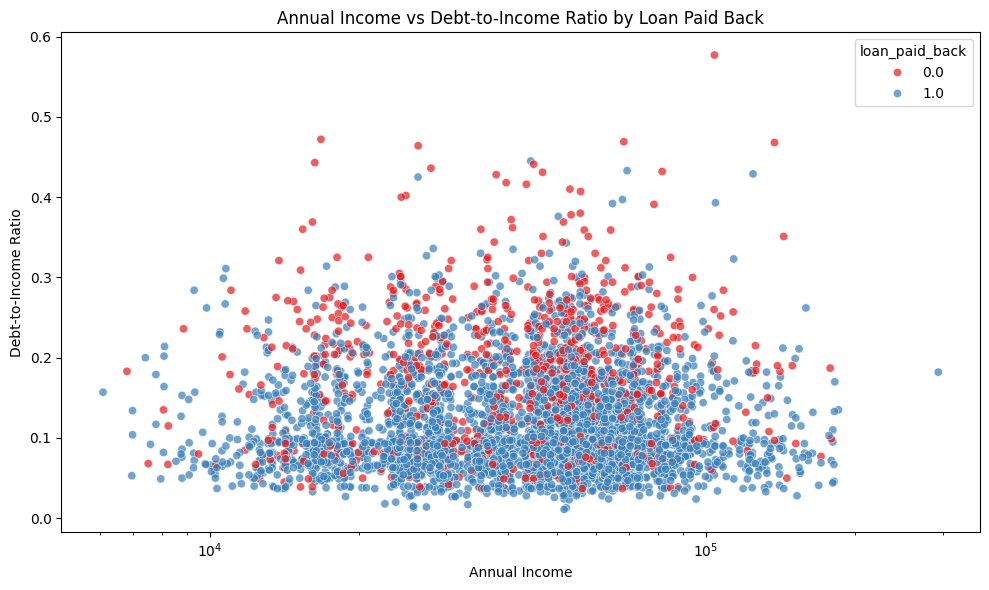

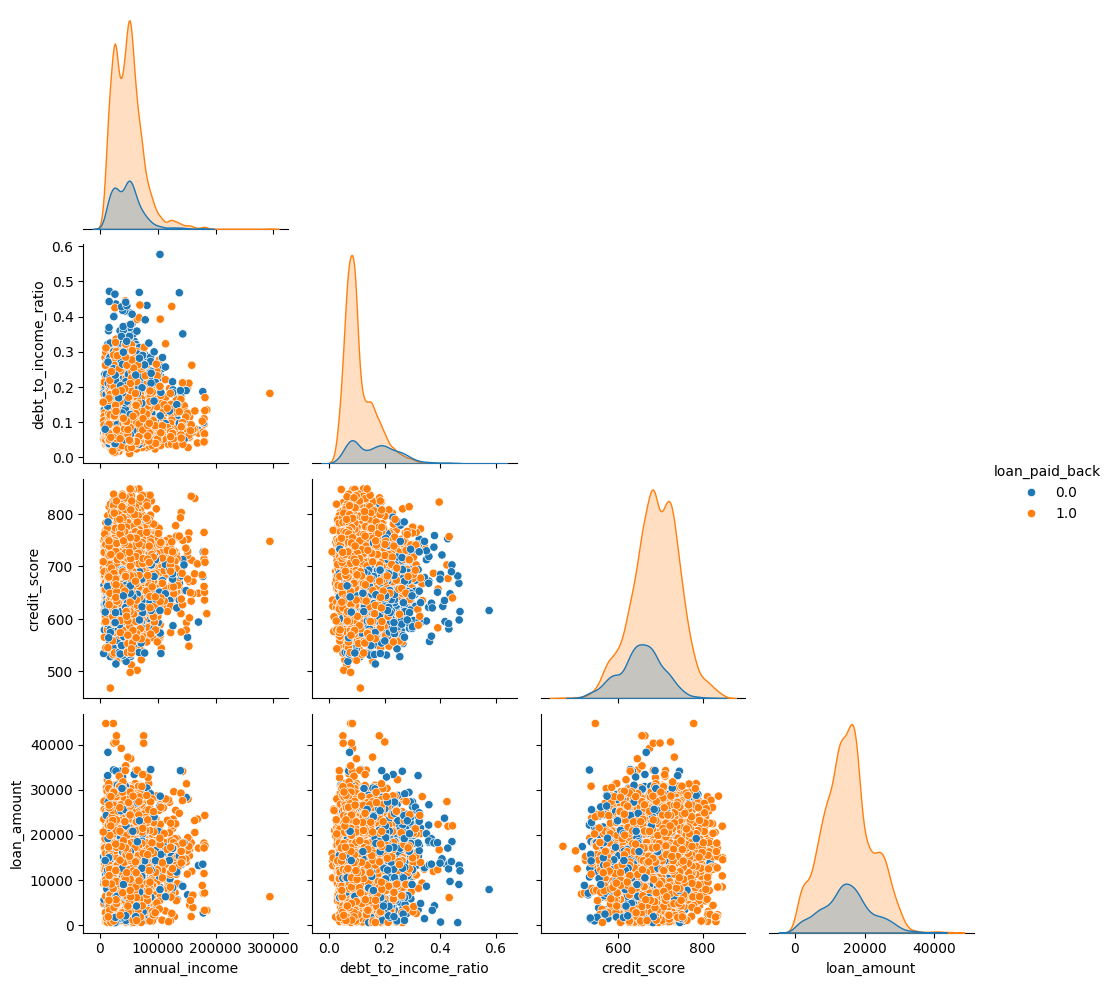

In [4]:
# Seabornで散布図を作成：年収 vs 債務比率（loan_paid_backで色分け）
# データが大きい場合はサンプリングして描画速度を改善します
sample_df = train_df.sample(n=5000, random_state=42) if len(train_df) > 5000 else train_df

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=sample_df,
    x='annual_income',
    y='debt_to_income_ratio',
    hue='loan_paid_back',
    palette='Set1',
    alpha=0.7
)
plt.title('Annual Income vs Debt-to-Income Ratio by Loan Paid Back')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
# 年収は偏りがあることが多いため、ログスケールが有効な場合があります
try:
    plt.xscale('log')
except Exception:
    pass
plt.tight_layout()

# 必要なら pairplot の例（計算コスト高）：
sns.pairplot(sample_df[['annual_income','debt_to_income_ratio','credit_score','loan_amount','loan_paid_back']], hue='loan_paid_back', diag_kind='kde', corner=True)
